In [1]:
%matplotlib inline

In [2]:
import time
import numpy
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


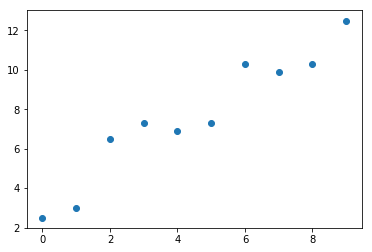

In [3]:
X = numpy.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Y = numpy.array([2.5, 3, 6.5, 7.3, 6.9, 7.3, 10.3, 9.9, 10.3, 12.5])

plt.scatter(X, Y)

In [4]:
alpha = 0.06
x_size = 10
k = 0
m = 0

def h(x):
    return k + m*x

In [5]:
def iteration(k, m):
    errors = numpy.subtract(h(X), Y)
    errors_times_x = numpy.multiply(errors, X)
    k = k - alpha * (1/x_size) * numpy.sum(errors)
    m = m - alpha * (1/x_size) * numpy.sum(errors_times_x)
    squared_errors = numpy.multiply(errors, errors)
    plt.plot(X, h(X), 'r-')
    plt.plot(X, Y, 'bo')
    plt.show()
    print("Cost:", 0.5 * (1/x_size) * numpy.sum(squared_errors))
    return (k, m)

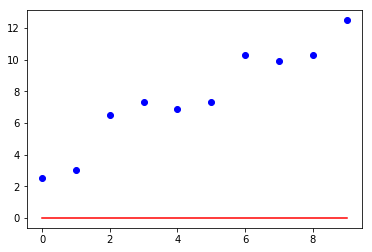

Cost: 33.9065


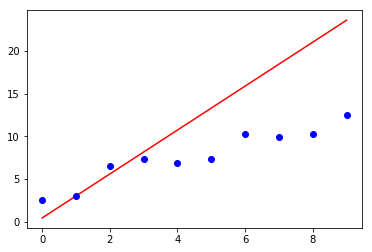

Cost: 19.8676865


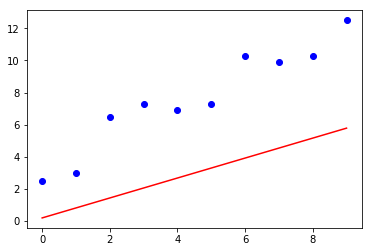

Cost: 11.8905750889


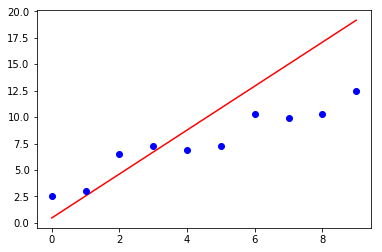

Cost: 7.35156350933


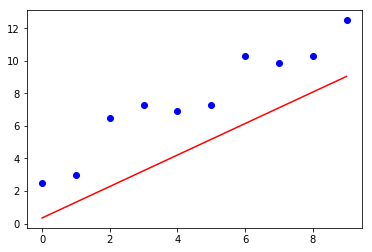

Cost: 4.76279801613


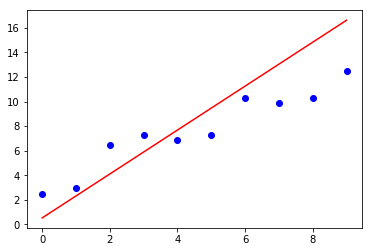

Cost: 3.28050460295


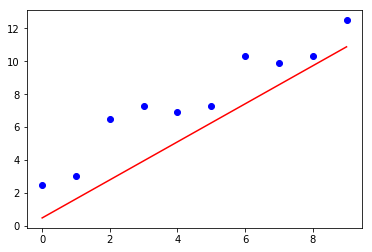

Cost: 2.42616528278


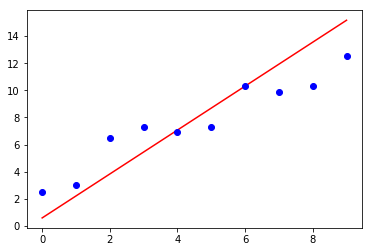

Cost: 1.92839808003


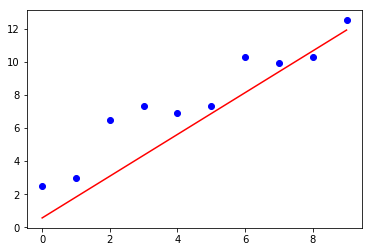

Cost: 1.6332876899


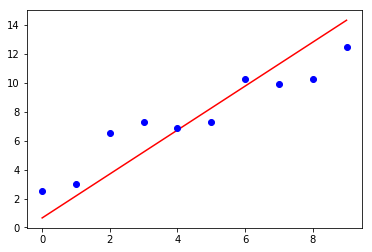

Cost: 1.4535342803


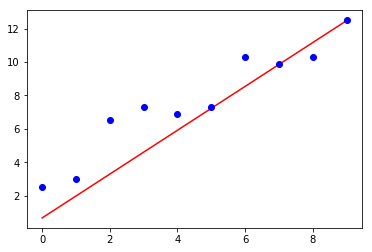

Cost: 1.33961593187


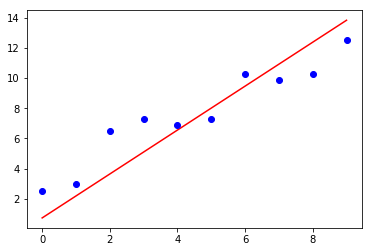

Cost: 1.26343493836


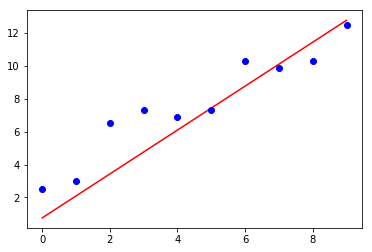

Cost: 1.2090436624


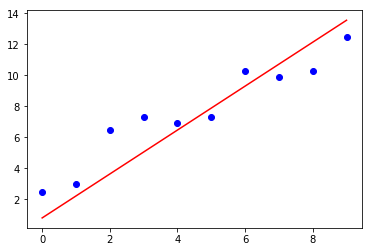

Cost: 1.16738518398


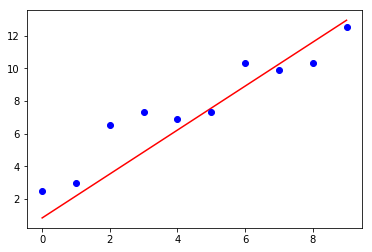

Cost: 1.13331072467


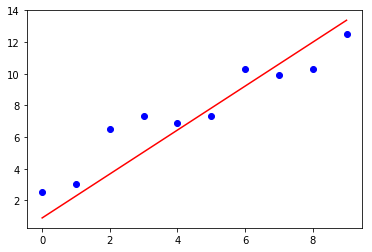

Cost: 1.1038882242


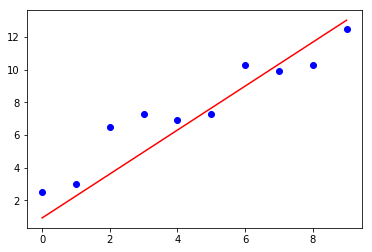

Cost: 1.07744312579


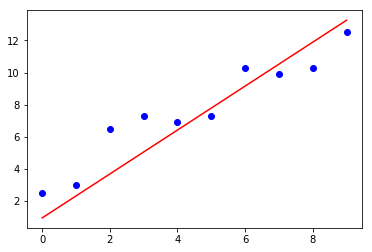

Cost: 1.05301439486


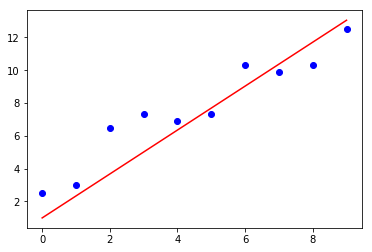

Cost: 1.03004601588


In [6]:
k = 0
m = 0

for i in range(1,20):
    (k, m) = iteration(k, m)
    time.sleep(1)